In [1]:
#Logistical regression-> linear is used for continuous data, but the categorical data can not be placed in a straight, we use logistical regression
#sigmoid, a s-type of curve is used to predict, the actual points must lie inside the s-curve; usually two sets of categories are taken
#confusion matrix gives the accuracy in tabular form and tells how many categorical data prediction was correct
#for over-fit models, lasso and ridge models are used

# Package import

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [83]:
data = pd.read_csv(r"C:\Users\CTTC\Downloads\iris (2).data",header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [84]:
data.columns = ['SL','SW','PL','PW','flower']   
data

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
data.isnull().sum()

SL        0
SW        0
PL        0
PW        0
flower    0
dtype: int64

In [45]:
data.dtypes

SL        float64
SW        float64
PL        float64
PW        float64
flower     object
dtype: object

In [86]:
for i in data.columns:
    print(i,'\n',data[i].unique(),'\n')

SL 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9] 

SW 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6] 

PL 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2] 

PW 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3] 

flower 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



# Data Analysis

          SL        SW        PL        PW
SL  1.000000 -0.109369  0.871754  0.817954
SW -0.109369  1.000000 -0.420516 -0.356544
PL  0.871754 -0.420516  1.000000  0.962757
PW  0.817954 -0.356544  0.962757  1.000000


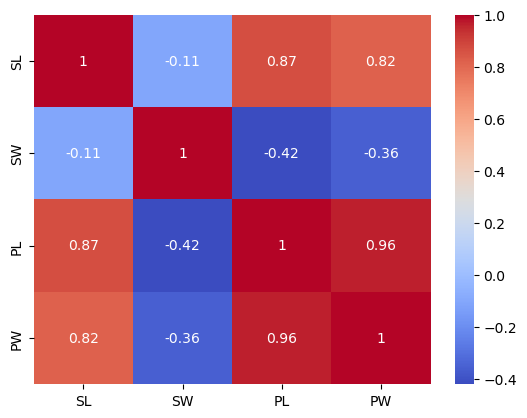

In [47]:
#heatmap
cor = data.corr()
print(cor)
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

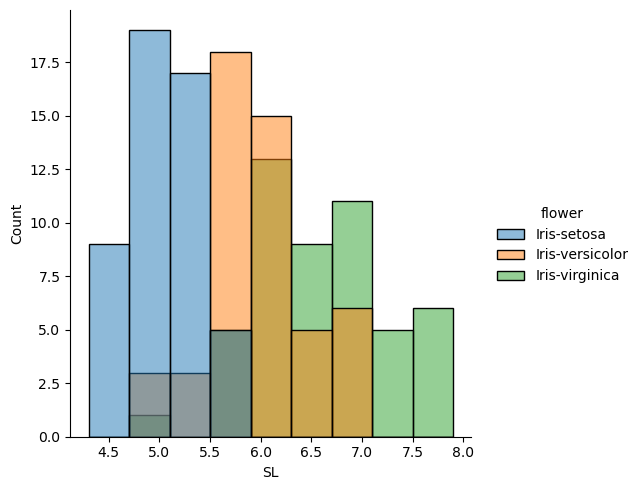

In [50]:
sns.displot(x=data.SL,hue=data.flower)
plt.show()

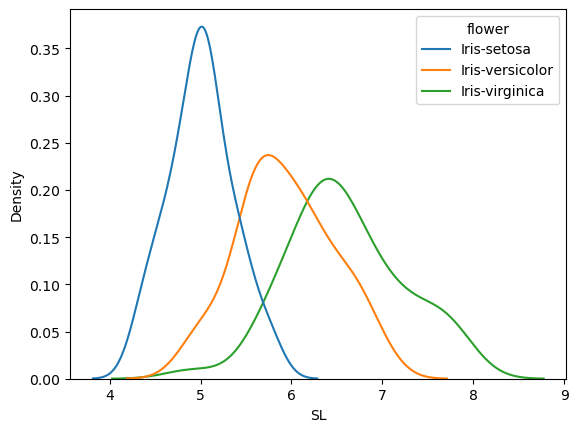

In [51]:
sns.kdeplot(x=data.SL,hue=data.flower)
plt.show()

# Label Encoding

In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['flower'] = le.fit_transform(data['flower'])           #encoding
data['flower'].unique()

array([0, 1, 2])

In [88]:
data.flower = le.inverse_transform(data.flower)    #decoding

In [36]:
data.head()

,SL,SW,PL,PW,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# ip/op creation

In [90]:
ip=data.drop('flower',axis=1)
op=data.flower

# Logistic Regression

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=5)

y_test.head()

82     1
134    2
114    2
42     0
109    2
Name: flower, dtype: int32

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)    
x_test = sc.fit_transform(x_test)


In [93]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
yp = lr.predict(x_test)
yp

array([1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [95]:
#confusion matrix-> the daigonal elements are TP, the left lower triangle is FN, and the right upper triangle is FP
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yp)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  3,  8]], dtype=int64)

In [97]:
#accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,yp)
print('Accuracy is:',accuracy)

Accuracy is: 0.9


In [101]:
precision = metrics.precision_score(y_test,yp,average='macro')
print('Precision is:',precision)

Precision is: 0.9285714285714285


In [102]:
recall = metrics.recall_score(y_test,yp,average='macro')
print('Recall is:',recall)

Recall is: 0.9090909090909092


In [104]:
f1 = metrics.f1_score(y_test,yp,average='macro')
print('F1 score is:',f1)

F1 score is: 0.9073684210526315
